<h1 align="center">Uncertainty Estimation</h1>


## Load Packages

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
import tensorflow as tf

## Load MNIST and Pre-process
- We load MNIST dataset for with lesser samples per class

In [2]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Create masks for filtering
train_mask = (y_train >= 1) & (y_train <= 8)
test_mask = (y_test >= 1) & (y_test <= 8)
conf_mask_train = (y_train == 0) | (y_train == 9)
conf_mask_test = (y_test == 0) | (y_test == 9)

# Separate the datasets
x_conf, y_conf = np.concatenate([x_train[conf_mask_train], x_test[conf_mask_test]]), np.concatenate([y_train[conf_mask_train], y_test[conf_mask_test]])
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Limit dataset to 500 samples per class for training and 100 per class for testing
selected_train_indices = np.hstack([np.random.choice(np.where(y_train == i)[0], 200, replace=False) for i in range(1, 9)])
selected_test_indices = np.hstack([np.random.choice(np.where(y_test == i)[0], 50, replace=False) for i in range(1, 9)])
selected_conf_indices = np.hstack([np.random.choice(np.where(y_conf == i)[0], 50, replace=False) for i in [0, 9]])

x_train, y_train = x_train[selected_train_indices], y_train[selected_train_indices]
x_test, y_test = x_test[selected_test_indices], y_test[selected_test_indices]
x_conf, y_conf = x_conf[selected_conf_indices], y_conf[selected_conf_indices]

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_conf = x_conf.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train - 1, num_classes=8)
y_test = to_categorical(y_test - 1, num_classes=8)
y_conf = to_categorical((y_conf == 9).astype(int), num_classes=2)  # Convert 0 and 9 labels to binary class

# Create Validation Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes to verify
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"x_conf shape: {x_conf.shape}, y_conf shape: {y_conf.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (1280, 28, 28, 1), y_train shape: (1280, 8)
x_test shape: (400, 28, 28, 1), y_test shape: (400, 8)
x_conf shape: (100, 28, 28, 1), y_conf shape: (100, 2)
x_val shape: (320, 28, 28, 1), y_val shape: (320, 8)


In [3]:
NUM_EPOCHS = 30
_, IMG_ROWS, IMG_COLS,_= x_train.shape
num_classes=y_train.shape[1]
num_classes

8

In [ ]:
def make_model(shape, num_classes):
    (temp, t, f, num) = shape
    inputs = tf.keras.layers.Input(shape=(t, f, num))
    x = tf.keras.layers.Conv2D(10, 3, strides=2, activation='relu', padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(10, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = make_model(x_train.shape, num_classes)

In [ ]:
# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
# from sklearn.utils import shuffle

# x_train, y_train = shuffle(x_train, y_train)

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=NUM_EPOCHS,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1082 - loss: 2.4240 - val_accuracy: 0.2750 - val_loss: 2.0680
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2264 - loss: 1.9809 - val_accuracy: 0.3375 - val_loss: 2.0472
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2708 - loss: 1.8440 - val_accuracy: 0.3750 - val_loss: 2.0173
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2901 - loss: 1.7459 - val_accuracy: 0.4094 - val_loss: 1.9821
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3604 - loss: 1.6462 - val_accuracy: 0.4437 - val_loss: 1.9475
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4213 - loss: 1.4993 - val_accuracy: 0.4625 - val_loss: 1.9043
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4989 - loss: 1.3397 - val_accuracy: 0.4812 - val_loss: 1.8600
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5544 - loss: 1.2416 - val_accuracy: 0.5375 - v

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.96      0.86      0.91        50
           2       0.90      0.88      0.89        50
           3       0.92      0.90      0.91        50
           4       0.86      0.88      0.87        50
           5       0.90      0.92      0.91        50
           6       0.81      0.96      0.88        50
           7       0.98      0.84      0.90        50

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.91       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
# test_image=x_conf[9]
# test_label=y_conf[9]


test_image=x_test[9]
# test_label=y_test[9]


# Visualize the selected image
plt.imshow(test_image.squeeze(), cmap='gray')  # Remove extra dimensions and plot
plt.title("Sample Image from x_test")
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
# Define a subclassed model to keep dropout active during inference
class MCDropoutModel(tf.keras.Model):
    def __init__(self, model):
        super(MCDropoutModel, self).__init__()
        self.model = model

    def call(self, inputs, training=False):
        return self.model(inputs, training=True)  # Force dropout to be active

mc_model = MCDropoutModel(model)

# Function to apply MC Dropout for confidence estimation
def mc_dropout_predictions(mc_model, x_sample, num_samples=50):
    preds = np.array([mc_model(x_sample, training=True).numpy() for _ in range(num_samples)])
    return preds

# reshape to pass through the model
x_sample = np.expand_dims(test_image, axis=0)
num_samples = 50  # Number of stochastic forward passes

# Get MC Dropout predictions
mc_preds = mc_dropout_predictions(mc_model, x_sample, num_samples)

# Compute mean and variance
mean_prediction = np.mean(mc_preds, axis=0)
variance = np.var(mc_preds, axis=0)
confidence_score = 1 - variance.max()  # Confidence estimate

# Print results
print("Mean Prediction:", mean_prediction)
print("Variance:", variance)
print("Confidence Score:", confidence_score)

Mean Prediction: [[0.6809185  0.01567085 0.06731349 0.00817695 0.0639661  0.14749056
  0.0069478  0.00951573]]
Variance: [[0.02996465 0.00094459 0.0036126  0.00014388 0.00872657 0.00466986
  0.00016678 0.0002668 ]]
Confidence Score: 0.9700353518128395


In [4]:
test_image_1 = np.expand_dims(test_image, axis=0)
y_pred = model.predict(test_image_1)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)
y_pred

NameError: name 'test_image' is not defined

In [ ]:
import tensorflow as tf
import numpy as np
import scipy.stats

# Define a subclassed model to keep dropout active during inference
class MCDropoutModel(tf.keras.Model):
    def __init__(self, model):
        super(MCDropoutModel, self).__init__()
        self.feature_extractor = tf.keras.Model(model.input, model.layers[-1].output)  # Remove softmax layer

    def call(self, inputs, training=False):
        return self.feature_extractor(inputs, training=True)  # Force dropout to be active

# Convert model to MC Dropout model
mc_model = MCDropoutModel(model)

# Function to apply MC Dropout for confidence estimation
def mc_dropout_predictions(mc_model, x_sample, num_samples=50):
    """Perform multiple stochastic forward passes to obtain logits distribution."""
    logits_samples = np.array([mc_model(x_sample, training=True).numpy().squeeze() for _ in range(num_samples)])
    return logits_samples  # Shape: (50, 8)

# Select one example from x_test
x_sample = np.expand_dims(test_image, axis=0)  # Ensure shape (1, t, f, num)
num_samples = 50  # Number of stochastic forward passes

# Get MC Dropout predictions (logits)
logits_samples = mc_dropout_predictions(mc_model, x_sample, num_samples)  # Shape: (50, 8)

# Convert logits to probabilities for each stochastic pass
probs_samples = scipy.special.softmax(logits_samples, axis=-1)  # Shape: (50, 8)

# Compute entropy for each class separately across the 50 samples
entropy = -np.mean(logits_samples * np.log(logits_samples + 1e-8), axis=0)  # Shape: (8,)

# Compute confidence as (1 - entropy) for each class
confidence_score = 1 - entropy  # Shape: (8,)

# Print results
print("Mean Logits:", np.mean(logits_samples, axis=0))
print("Logits Variance:", np.var(logits_samples, axis=0))
print("Entropy:", entropy)
print("Confidence Score:", confidence_score)


Mean Logits: [0.6767532  0.02073334 0.05191001 0.01055675 0.04607066 0.17855847
 0.00396948 0.01144823]
Logits Variance: [3.4668688e-02 1.1285669e-03 4.3913876e-03 2.8368976e-04 8.5690441e-03
 8.0416650e-03 5.2973326e-05 3.1052626e-04]
Entropy: [0.23453256 0.06340329 0.12870449 0.03962028 0.09865805 0.28596053
 0.01822246 0.04165397]
Confidence Score: [0.7654674  0.9365967  0.8712955  0.9603797  0.901342   0.71403944
 0.98177755 0.958346  ]


In [ ]:
import tensorflow as tf

def make_model(shape, num_classes):
    (temp, t, f, num) = shape
    inputs = tf.keras.layers.Input(shape=(t, f, num))

    x = tf.keras.layers.Conv2D(10, 3, strides=2, activation='relu', padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(10, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    # Output mean (mu)
    mu = tf.keras.layers.Dense(num_classes, activation=None, name="mu")(x)

    # Output log variance (log_sigma^2) with softplus to ensure positivity
    log_sigma_sq = tf.keras.layers.Dense(num_classes, activation=tf.nn.softplus, name="log_sigma_sq")(x)

    model = tf.keras.Model(inputs=inputs, outputs=[mu, log_sigma_sq])
    return model

model = make_model(x_train.shape, num_classes)


In [ ]:
import tensorflow as tf

class BayesianCrossEntropy(tf.keras.losses.Loss):
    def __init__(self, num_samples=10):
        super().__init__()
        self.num_samples = num_samples  # Number of Monte Carlo samples

    def call(self, y_true, y_pred):
        mu, log_sigma_sq = y_pred  # Model outputs (mean and log variance)
        sigma = tf.exp(0.5 * log_sigma_sq)  # Convert log variance to std dev

        # Monte Carlo sampling of predictions
        batch_size = tf.shape(mu)[0]
        num_classes = tf.shape(mu)[1]

        epsilon = tf.random.normal(shape=(self.num_samples, batch_size, num_classes))  # N(0, I)
        x_t = mu[None, :, :] + sigma[None, :, :] * epsilon  # Perturbed logits

        # Compute log-softmax for each sample
        log_probs = tf.nn.log_softmax(x_t, axis=-1)  # (num_samples, batch, num_classes)

        # Compute expectation over samples
        avg_log_probs = tf.reduce_logsumexp(log_probs, axis=0) - tf.math.log(float(self.num_samples))

        # Compute negative log likelihood for correct class
        loss = -tf.reduce_mean(tf.reduce_sum(y_true * avg_log_probs, axis=-1))
        return loss


In [ ]:
probs_samples.shape

(50, 8)

In [ ]:
logits_samples[0]

array([0.7353206 , 0.00782632, 0.11813495, 0.00282696, 0.04902739,
       0.08118229, 0.00195502, 0.00372643], dtype=float32)

In [ ]:
x_sample.shape

(1, 28, 28, 1)

In [ ]:
probs_samples.shape

(50, 1, 8)

In [ ]:
entropy

array([[1.33835463e-04, 1.51131570e-01, 2.51248449e-01, 1.15201947e-04,
        1.54462725e-01, 2.14732811e-03, 5.68378542e-04, 1.00871893e-02],
       [7.98064843e-03, 3.48301604e-02, 2.55671710e-01, 7.47245029e-02,
        1.67684987e-01, 7.01546296e-02, 2.55041599e-01, 2.07509235e-01],
       [5.28224104e-04, 4.68023829e-02, 6.86879307e-02, 5.45162242e-04,
        3.65982838e-02, 1.86499511e-03, 2.33895238e-03, 4.48357575e-02],
       [4.95832792e-05, 1.40492886e-01, 2.55010098e-01, 3.90142195e-05,
        1.52325451e-01, 1.30619027e-03, 1.90714243e-04, 6.93511683e-03],
       [2.09552076e-04, 2.84640938e-01, 3.43603224e-01, 2.92131474e-04,
        3.66774321e-01, 1.55410985e-03, 1.04372727e-03, 3.44323600e-03],
       [6.28288690e-05, 6.17998764e-02, 8.23713243e-02, 3.23886379e-05,
        3.69137637e-02, 1.52047665e-03, 1.95514236e-04, 9.00920574e-03],
       [9.63232233e-05, 1.15115933e-01, 1.84123769e-01, 6.78158249e-05,
        9.98235047e-02, 1.98343932e-03, 3.06992821e-04, 1.

In [ ]:
entropy = - 1.0 * np.sum(mc_preds * np.log(mc_preds + 1e-16), axis=1)
mean_entropy = np.mean(entropy, axis=0)
mean_entropy

array([0.23683418, 0.0528193 , 0.15995343, 0.03419844, 0.1300023 ,
       0.26736736, 0.02757484, 0.03655317], dtype=float32)

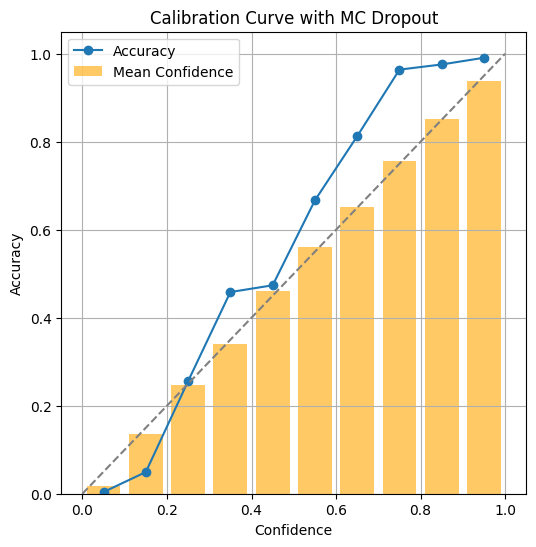

In [ ]:

# Function to generate calibration curve
def multiclass_calibration_curve(probs, labels, bins=10):
    step_size = 1.0 / bins
    n_classes = probs.shape[1]
    labels_ohe = np.eye(n_classes)[labels.astype(np.int64)]

    midpoints = []
    mean_confidences = []
    accuracies = []

    for i in range(bins):
        beg = i * step_size
        end = (i + 1) * step_size

        bin_mask = (probs >= beg) & (probs < end)
        bin_cnt = bin_mask.astype(np.float32).sum()
        if bin_cnt == 0:
            continue
        bin_confs = probs[bin_mask]
        bin_acc = labels_ohe[bin_mask].sum() / bin_cnt

        midpoints.append((beg+end)/2.)
        mean_confidences.append(np.mean(bin_confs))
        accuracies.append(bin_acc)

    return midpoints, accuracies, mean_confidences

# Get MC Dropout predictions for full test set
mc_preds_test = mc_dropout_predictions(mc_model, x_test, num_samples)
probs = np.mean(mc_preds_test, axis=0)
labels = np.argmax(y_test, axis=1)

# Compute calibration curve
midpoints, accuracies, mean_confidences = multiclass_calibration_curve(probs, labels)

# Plot calibration curve
plt.figure(figsize=(6, 6))
plt.plot(midpoints, accuracies, marker='o', linestyle='-', label='Accuracy')
plt.bar(midpoints, mean_confidences, width=0.08, alpha=0.6, label='Mean Confidence', color='orange')
#plt.plot(midpoints, mean_confidences, marker='s', linestyle='--', label='Confidence')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')  # Perfect calibration line
plt.xlabel("Confidence")
plt.ylabel("Accuracy")
plt.title("Calibration Curve with MC Dropout")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## Ensamble Method

In [ ]:
test_image=x_test[0]

In [ ]:

# Function to apply Gaussian noise perturbations
def apply_gaussian_noise(x_sample, num_samples=50, noise_std=0.1):
    noisy_samples = [x_sample + np.random.normal(0, noise_std, x_sample.shape) for _ in range(num_samples)]
    return np.clip(np.array(noisy_samples), 0.0, 1.0)  # Clip to valid range

# Select one example from x_test
x_sample = np.expand_dims(test_image, axis=0)  # Select the first test example
num_samples = 50  # Number of stochastic forward passes

# Generate noisy samples
noisy_samples = apply_gaussian_noise(x_sample, num_samples)

# Get model predictions for noisy samples
y_preds = np.array([model.predict(noisy_sample) for noisy_sample in noisy_samples])

# Compute mean and variance
mean_prediction = np.mean(y_preds, axis=0)
variance = np.var(y_preds, axis=0)
confidence_score = 1 - variance.max()  # Confidence estimate

# Print results
print("Mean Prediction:", mean_prediction)
print("Variance:", variance)
print("Confidence Score:", confidence_score)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━

In [ ]:
test_image_1 = np.expand_dims(test_image, axis=0)
y_pred = model.predict(test_image_1)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[7.9457253e-01, 1.1161583e-02, 1.2055728e-02, 3.7024776e-03,
        3.7166497e-03, 1.7252794e-01, 4.0475861e-04, 1.8583754e-03]],
      dtype=float32)

In [ ]:
# # Function to generate calibration curve
# def multiclass_calibration_curve(probs, labels, bins=10):
#     step_size = 1.0 / bins
#     n_classes = probs.shape[1]
#     labels_ohe = np.eye(n_classes)[labels.astype(np.int64)]

#     midpoints = []
#     mean_confidences = []
#     accuracies = []

#     for i in range(bins):
#         beg = i * step_size
#         end = (i + 1) * step_size

#         bin_mask = (probs >= beg) & (probs < end)
#         bin_cnt = bin_mask.astype(np.float32).sum()
#         if bin_cnt == 0:
#             continue
#         bin_confs = probs[bin_mask]
#         bin_acc = labels_ohe[bin_mask].sum() / bin_cnt

#         midpoints.append((beg+end)/2.)
#         mean_confidences.append(np.mean(bin_confs))
#         accuracies.append(bin_acc)

#     return midpoints, accuracies, mean_confidences

# # # Apply Gaussian noise and reshape correctly
# # noisy_x_test = np.array([apply_gaussian_noise(img, num_samples) for img in test_image])
# # noisy_x_test = noisy_x_test.reshape(-1, *test_image.shape[1:])  # Flatten to (batch_size, H, W, C)
# # print(test_image.shape)
# # print(noisy_x_test.shape)
# # # Get predictions for full test set
# # y_preds_test = model.predict(noisy_x_test)

# # Compute probabilities and calibration curve
# probs = mean_prediction
# labels = np.argmax(y_test, axis=1)

# # Compute calibration curve
# midpoints, accuracies, mean_confidences = multiclass_calibration_curve(probs, labels)

# # Plot calibration curve
# plt.figure(figsize=(6, 6))
# plt.plot(midpoints, accuracies, marker='o', linestyle='-', label='Actual')
# plt.plot(midpoints, mean_confidences, marker='s', linestyle='--', label='Confidence')
# plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')  # Perfect calibration line
# plt.xlabel("Confidence")
# plt.ylabel("Accuracy")
# plt.title("Calibration Curve with Gaussian Noise Perturbations")
# plt.legend()
# plt.grid()
# plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 1

## TCN Model (Auxiliary Model)

In [ ]:
TCN_model=model
TCN_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 490)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           4,910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,376 (60.07 KB)

 Trainable params: 5,118 (19.99 KB)

 Non-trainable params: 20 (80.00 B)

 Optimizer params: 10,238 (40.00 KB)

In [ ]:
from keras.models import Model
for layer in TCN_model.layers:
    layer.trainable = False


# Extract the penultimate layer (feature maps before softmax)
feature_extractor = Model(inputs=TCN_model.input, outputs=TCN_model.layers[-3].output)
feature_extractor.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 490)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           4,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,050 (19.73 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,050 (19.73 KB)

In [ ]:
# Pass these feature maps through ConfidNet
x = feature_extractor.output
x = Dense(64,activation='relu')(x)
x = Dense(32,activation='relu')(x)
# x = Dense(10,activation='relu')(x)
x = Dense(10,activation='relu')(x)#,kernel_initializer='he_normal',kernel_regularizer=l2(1e-5),bias_regularizer=l2(1e-5))(x)  # Dense layers for confidence prediction
confidence_output = Dense(1, activation='sigmoid', name='confidence')(x)#,kernel_initializer='he_normal',kernel_regularizer=l2(1e-5),bias_regularizer=l2(1e-5), name='confidence')(x)

In [ ]:
confidnet_model = Model(inputs=TCN_model.input, outputs=[confidence_output])

In [ ]:
confidnet_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 490)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           4,910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ confidence (Dense)                   │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,175 (31.93 KB)

 Trainable params: 3,125 (12.21 KB)

 Non-trainable params: 5,050 (19.73 KB)

In [ ]:
batch_size = 64
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
## Code for TCP-R
def l_conf(y_true, y_pred, y_conf):
    # y_true: (batch_size, num_classes)
    # y_pred: (batch_size, num_classes)
    # y_conf: (batch_size, 1)

    # Get the index of the true class for each sample
    true_indices = tf.argmax(y_true, axis=-1)  # Shape: (batch_size,)

    # Get the maximum confidence prediction (MCP) for each sample
    max_conf = tf.reduce_max(y_pred, axis=-1)  # Shape: (batch_size,)

    # Gather the predicted confidence for the true class (TCP)
    c_star = tf.gather(y_pred, true_indices, axis=1, batch_dims=1)  # Shape: (batch_size,)
    c_star_normalized = tf.where(
        tf.equal(c_star, max_conf),  # Condition: if c_star == max_conf
        c_star / (max_conf + 1e-8),  # True branch: c_star / (max_conf + 1e-8)
        c_star / (c_star + max_conf + 1e-8)  # False branch: c_star / (c_star + max_conf + 1e-8)
    )
    # print(c_star_normalized)

    # Normalize the true class confidence by the maximum confidence (TCP/MCP)
   # c_star_normalized = c_star / (max_conf + 1e-8)  # Shape: (batch_size,)

    # Reshape c_star_normalized to match y_conf shape
    c_star_normalized = tf.expand_dims(c_star_normalized, axis=-1)  # Shape: (batch_size, 1)

    # Create sample weights
    # Assign a higher weight to error examples (where c_star_normalized < 1)
    # and a lower weight to success examples (where c_star_normalized == 1)
    success_mask = tf.cast(tf.equal(c_star_normalized, 1.0), tf.float32)
    #print(success_mask)
    error_mask = tf.cast(tf.less(c_star_normalized, 1.0), tf.float32)
    #print(error_mask)

    # Define weights
    success_weight = 1  # Adjust this value as needed
    error_weight = 1    # Adjust this value as needed

    # Compute sample weights
    sample_weights = success_weight * success_mask + error_weight * error_mask  # Shape: (batch_size, 1)

    # Compute the per-sample MSE loss without reduction
    mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    loss_per_sample = mse(c_star_normalized, y_conf)  # Shape: (batch_size, 1)

    # Apply sample weights
    weighted_loss = loss_per_sample * sample_weights  # Shape: (batch_size, 1)

    # Compute the mean loss over the batch
    loss = tf.reduce_mean(weighted_loss)

    return loss


In [ ]:
# def l_conf(y_true, y_pred, y_conf):
#     # y_true: (batch_size, num_classes)
#     # y_pred: (batch_size, num_classes)
#     # y_conf: (batch_size, 1)

#     # Get the index of the true class for each sample
#     true_indices = tf.argmax(y_true, axis=-1)  # Shape: (batch_size,)

#     # Get the maximum confidence prediction (MCP) for each sample
#     max_conf = tf.reduce_max(y_pred, axis=-1)  # Shape: (batch_size,)

#     # Gather the predicted confidence for the true class (TCP)
#     c_star = tf.gather(y_pred, true_indices, axis=1, batch_dims=1)  # Shape: (batch_size,)
#     c_star_normalized = tf.where(
#         tf.equal(c_star, max_conf),  # Condition: if c_star == max_conf
#         c_star / (max_conf + 1e-8),  # True branch: c_star / (max_conf + 1e-8)
#         c_star / (c_star + max_conf + 1e-8)  # False branch: c_star / (c_star + max_conf + 1e-8)
#     )

#     # Normalize the true class confidence by the maximum confidence (TCP/MCP)
#    # c_star_normalized = c_star / (max_conf + 1e-8)  # Shape: (batch_size,)

#     # Reshape c_star_normalized to match y_conf shape
#     c_star_normalized = tf.expand_dims(c_star, axis=-1)  # Shape: (batch_size, 1)

#     # Create sample weights
#     # Assign a higher weight to error examples (where c_star_normalized < 1)
#     # and a lower weight to success examples (where c_star_normalized == 1)
#     success_mask = tf.cast(tf.equal(c_star_normalized, 1.0), tf.float32)
#     #print(success_mask)
#     error_mask = tf.cast(tf.less(c_star_normalized, 1.0), tf.float32)
#     #print(error_mask)

#     # Define weights
#     success_weight = 1  # Adjust this value as needed
#     error_weight = 1    # Adjust this value as needed

#     # Compute sample weights
#     sample_weights = success_weight * success_mask + error_weight * error_mask  # Shape: (batch_size, 1)

#     # Compute the per-sample MSE loss without reduction
#     mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
#     loss_per_sample = mse(c_star_normalized, y_conf)  # Shape: (batch_size, 1)

#     # Apply sample weights
#     weighted_loss = loss_per_sample  # Shape: (batch_size, 1)

#     # Compute the mean loss over the batch
#     loss = tf.reduce_mean(weighted_loss)

#     return loss


In [ ]:
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pre = TCN_model(x, training=True)  # Shape: (batch_size, num_classes)
        y_conf = confidnet_model(x, training=True)  # Shape: (batch_size, 1)

        # Calculate loss with the updated loss function
        loss = l_conf(y, y_pre, y_conf)
    grads = tape.gradient(loss, confidnet_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, confidnet_model.trainable_variables))
    return loss

def test_step(x, y):
    y_pre = TCN_model(x, training=False)  # Shape: (batch_size, num_classes)
    y_conf = confidnet_model(x, training=False)  # Shape: (batch_size, 1)
    loss = l_conf(y, y_pre, y_conf)
    return loss


In [ ]:
epochs=200

In [ ]:
y_train.shape

(1280, 8)

In [ ]:
# Create the balanced training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Optimize dataset for validation
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
#val_dataset = val_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# for x, y in train_dataset.take(1).as_numpy_iterator():
#     print("Input Sample (x):", x.shape)
#     print("Label (y):", y)

In [ ]:
import numpy as np
import scipy.stats as stats

def compute_sample_weights(pred_values, num_bins=10):
    """
    Compute sample weights based on the probability density function (PDF) of predicted values.

    Parameters:
    - pred_values (numpy array): Array of predicted values (between 0 and 1).
    - num_bins (int): Number of bins for density estimation.

    Returns:
    - weights (numpy array): Computed sample weights.
    """
    pred_values = np.asarray(pred_values)

    # Estimate PDF using Kernel Density Estimation (KDE)
    kde = stats.gaussian_kde(pred_values)

    # Compute PDF for each sample
    pdf_values = kde(pred_values)

    # Compute weights as inverse of PDF
    weights = 1.0 / (pdf_values + 1e-6)  # Adding epsilon to avoid division by zero

    # Normalize weights to keep them in a reasonable range
    weights /= np.max(weights)

    return weights

# Example Usage
pred_values = np.random.rand(1000)  # Simulating predicted values between 0 and 1
sample_weights = compute_sample_weights(pred_values)

print(sample_weights[:10])  # Print first 10 weights


In [ ]:
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pre = TCN_model(x, training=True)  # Shape: (batch_size, num_classes)
        y_conf = confidnet_model(x, training=True)  # Shape: (batch_size, 1)

        # Calculate loss with the updated loss function
        loss = l_conf(y, y_pre, y_conf)
    grads = tape.gradient(loss, confidnet_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, confidnet_model.trainable_variables))
    return loss

def test_step(x, y):
    y_pre = TCN_model(x, training=False)  # Shape: (batch_size, num_classes)
    y_conf = confidnet_model(x, training=False)  # Shape: (batch_size, 1)
    loss = l_conf(y, y_pre, y_conf)
    return loss


In [ ]:

# Training loop remains the same
from tqdm import tqdm

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Training step
    for step, (x_batch, y_batch) in enumerate(tqdm(val_dataset, total=len(val_dataset))):
        loss_value = train_step(x_batch, y_batch)

    # Validation step
    total_val_loss = 0
    for x_val_batch, y_val_batch in val_dataset:
        val_loss_value = test_step(x_val_batch, y_val_batch)
        total_val_loss += val_loss_value

    avg_val_loss = total_val_loss / len(val_dataset)
    print(f'Validation Loss: {avg_val_loss.numpy():.4f}')

Epoch 1/200


100%|██████████| 5/5 [00:00<00:00,  9.19it/s]


Validation Loss: 0.1735
Epoch 2/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.1703
Epoch 3/200


100%|██████████| 5/5 [00:00<00:00,  7.73it/s]


Validation Loss: 0.1670
Epoch 4/200


100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


Validation Loss: 0.1637
Epoch 5/200


100%|██████████| 5/5 [00:00<00:00,  9.57it/s]


Validation Loss: 0.1604
Epoch 6/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1572
Epoch 7/200


100%|██████████| 5/5 [00:00<00:00,  9.84it/s]


Validation Loss: 0.1541
Epoch 8/200


100%|██████████| 5/5 [00:00<00:00,  9.65it/s]


Validation Loss: 0.1511
Epoch 9/200


100%|██████████| 5/5 [00:01<00:00,  3.94it/s]


Validation Loss: 0.1482
Epoch 10/200


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Validation Loss: 0.1454
Epoch 11/200


100%|██████████| 5/5 [00:00<00:00,  9.15it/s]


Validation Loss: 0.1426
Epoch 12/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.1400
Epoch 13/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1374
Epoch 14/200


100%|██████████| 5/5 [00:00<00:00,  8.94it/s]


Validation Loss: 0.1348
Epoch 15/200


100%|██████████| 5/5 [00:00<00:00,  9.16it/s]


Validation Loss: 0.1323
Epoch 16/200


100%|██████████| 5/5 [00:00<00:00,  9.88it/s]


Validation Loss: 0.1299
Epoch 17/200


100%|██████████| 5/5 [00:00<00:00,  9.35it/s]


Validation Loss: 0.1274
Epoch 18/200


100%|██████████| 5/5 [00:00<00:00,  9.82it/s]


Validation Loss: 0.1251
Epoch 19/200


100%|██████████| 5/5 [00:00<00:00,  9.52it/s]


Validation Loss: 0.1228
Epoch 20/200


100%|██████████| 5/5 [00:00<00:00,  9.14it/s]


Validation Loss: 0.1206
Epoch 21/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.1184
Epoch 22/200


100%|██████████| 5/5 [00:00<00:00,  8.00it/s]


Validation Loss: 0.1163
Epoch 23/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1143
Epoch 24/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1124
Epoch 25/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.1105
Epoch 26/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1087
Epoch 27/200


100%|██████████| 5/5 [00:00<00:00,  9.49it/s]


Validation Loss: 0.1068
Epoch 28/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.1050
Epoch 29/200


100%|██████████| 5/5 [00:00<00:00,  9.38it/s]


Validation Loss: 0.1032
Epoch 30/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.1015
Epoch 31/200


100%|██████████| 5/5 [00:00<00:00,  9.33it/s]


Validation Loss: 0.0998
Epoch 32/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0981
Epoch 33/200


100%|██████████| 5/5 [00:00<00:00,  5.22it/s]


Validation Loss: 0.0965
Epoch 34/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0949
Epoch 35/200


100%|██████████| 5/5 [00:00<00:00,  9.98it/s]


Validation Loss: 0.0934
Epoch 36/200


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


Validation Loss: 0.0919
Epoch 37/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0904
Epoch 38/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0890
Epoch 39/200


100%|██████████| 5/5 [00:00<00:00,  8.85it/s]


Validation Loss: 0.0876
Epoch 40/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0863
Epoch 41/200


100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


Validation Loss: 0.0850
Epoch 42/200


100%|██████████| 5/5 [00:00<00:00,  9.50it/s]


Validation Loss: 0.0838
Epoch 43/200


100%|██████████| 5/5 [00:00<00:00,  9.64it/s]


Validation Loss: 0.0826
Epoch 44/200


100%|██████████| 5/5 [00:00<00:00,  9.42it/s]


Validation Loss: 0.0815
Epoch 45/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0803
Epoch 46/200


100%|██████████| 5/5 [00:00<00:00,  9.60it/s]


Validation Loss: 0.0792
Epoch 47/200


100%|██████████| 5/5 [00:00<00:00,  9.08it/s]


Validation Loss: 0.0781
Epoch 48/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0771
Epoch 49/200


100%|██████████| 5/5 [00:00<00:00,  9.67it/s]


Validation Loss: 0.0761
Epoch 50/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0751
Epoch 51/200


100%|██████████| 5/5 [00:00<00:00,  9.76it/s]


Validation Loss: 0.0742
Epoch 52/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0733
Epoch 53/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0724
Epoch 54/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0716
Epoch 55/200


100%|██████████| 5/5 [00:00<00:00,  8.36it/s]


Validation Loss: 0.0708
Epoch 56/200


100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


Validation Loss: 0.0700
Epoch 57/200


100%|██████████| 5/5 [00:00<00:00,  9.63it/s]


Validation Loss: 0.0692
Epoch 58/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0685
Epoch 59/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0678
Epoch 60/200


100%|██████████| 5/5 [00:00<00:00,  9.74it/s]


Validation Loss: 0.0671
Epoch 61/200


100%|██████████| 5/5 [00:00<00:00,  9.54it/s]


Validation Loss: 0.0665
Epoch 62/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0658
Epoch 63/200


100%|██████████| 5/5 [00:00<00:00,  9.33it/s]


Validation Loss: 0.0652
Epoch 64/200


100%|██████████| 5/5 [00:00<00:00,  9.35it/s]


Validation Loss: 0.0646
Epoch 65/200


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Validation Loss: 0.0641
Epoch 66/200


100%|██████████| 5/5 [00:00<00:00,  9.49it/s]


Validation Loss: 0.0635
Epoch 67/200


100%|██████████| 5/5 [00:00<00:00,  9.52it/s]


Validation Loss: 0.0629
Epoch 68/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0624
Epoch 69/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0619
Epoch 70/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0615
Epoch 71/200


100%|██████████| 5/5 [00:00<00:00,  9.45it/s]


Validation Loss: 0.0610
Epoch 72/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0605
Epoch 73/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0601
Epoch 74/200


100%|██████████| 5/5 [00:00<00:00,  9.80it/s]


Validation Loss: 0.0597
Epoch 75/200


100%|██████████| 5/5 [00:00<00:00,  9.71it/s]


Validation Loss: 0.0593
Epoch 76/200


100%|██████████| 5/5 [00:00<00:00,  9.64it/s]


Validation Loss: 0.0589
Epoch 77/200


100%|██████████| 5/5 [00:00<00:00,  9.70it/s]


Validation Loss: 0.0586
Epoch 78/200


100%|██████████| 5/5 [00:00<00:00,  9.25it/s]


Validation Loss: 0.0582
Epoch 79/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0578
Epoch 80/200


100%|██████████| 5/5 [00:00<00:00,  9.77it/s]


Validation Loss: 0.0575
Epoch 81/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0571
Epoch 82/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0568
Epoch 83/200


100%|██████████| 5/5 [00:00<00:00,  9.59it/s]


Validation Loss: 0.0565
Epoch 84/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0561
Epoch 85/200


100%|██████████| 5/5 [00:00<00:00,  9.48it/s]


Validation Loss: 0.0558
Epoch 86/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0556
Epoch 87/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0553
Epoch 88/200


100%|██████████| 5/5 [00:00<00:00,  7.14it/s]


Validation Loss: 0.0551
Epoch 89/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0548
Epoch 90/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0546
Epoch 91/200


100%|██████████| 5/5 [00:00<00:00,  9.54it/s]


Validation Loss: 0.0543
Epoch 92/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0541
Epoch 93/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0538
Epoch 94/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0536
Epoch 95/200


100%|██████████| 5/5 [00:00<00:00,  9.69it/s]


Validation Loss: 0.0533
Epoch 96/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0531
Epoch 97/200


100%|██████████| 5/5 [00:00<00:00,  9.60it/s]


Validation Loss: 0.0529
Epoch 98/200


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


Validation Loss: 0.0528
Epoch 99/200


100%|██████████| 5/5 [00:00<00:00,  9.97it/s]


Validation Loss: 0.0526
Epoch 100/200


100%|██████████| 5/5 [00:00<00:00,  9.69it/s]


Validation Loss: 0.0524
Epoch 101/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0523
Epoch 102/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0521
Epoch 103/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0519
Epoch 104/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0518
Epoch 105/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0516
Epoch 106/200


100%|██████████| 5/5 [00:00<00:00,  9.59it/s]


Validation Loss: 0.0514
Epoch 107/200


100%|██████████| 5/5 [00:00<00:00,  9.11it/s]


Validation Loss: 0.0513
Epoch 108/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0511
Epoch 109/200


100%|██████████| 5/5 [00:00<00:00,  9.92it/s]


Validation Loss: 0.0510
Epoch 110/200


100%|██████████| 5/5 [00:00<00:00,  9.56it/s]


Validation Loss: 0.0509
Epoch 111/200


100%|██████████| 5/5 [00:00<00:00,  9.42it/s]


Validation Loss: 0.0507
Epoch 112/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0506
Epoch 113/200


100%|██████████| 5/5 [00:00<00:00,  9.44it/s]


Validation Loss: 0.0505
Epoch 114/200


100%|██████████| 5/5 [00:00<00:00,  9.43it/s]


Validation Loss: 0.0504
Epoch 115/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0503
Epoch 116/200


100%|██████████| 5/5 [00:00<00:00,  9.56it/s]


Validation Loss: 0.0502
Epoch 117/200


100%|██████████| 5/5 [00:00<00:00,  9.54it/s]


Validation Loss: 0.0501
Epoch 118/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0500
Epoch 119/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0499
Epoch 120/200


100%|██████████| 5/5 [00:00<00:00,  7.77it/s]


Validation Loss: 0.0498
Epoch 121/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0497
Epoch 122/200


100%|██████████| 5/5 [00:00<00:00,  8.01it/s]


Validation Loss: 0.0497
Epoch 123/200


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


Validation Loss: 0.0496
Epoch 124/200


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


Validation Loss: 0.0495
Epoch 125/200


100%|██████████| 5/5 [00:00<00:00,  9.74it/s]


Validation Loss: 0.0494
Epoch 126/200


100%|██████████| 5/5 [00:00<00:00,  9.10it/s]


Validation Loss: 0.0493
Epoch 127/200


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Validation Loss: 0.0492
Epoch 128/200


100%|██████████| 5/5 [00:00<00:00,  9.59it/s]


Validation Loss: 0.0492
Epoch 129/200


100%|██████████| 5/5 [00:00<00:00,  9.72it/s]


Validation Loss: 0.0491
Epoch 130/200


100%|██████████| 5/5 [00:00<00:00,  9.59it/s]


Validation Loss: 0.0490
Epoch 131/200


100%|██████████| 5/5 [00:00<00:00,  9.30it/s]


Validation Loss: 0.0490
Epoch 132/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0489
Epoch 133/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0488
Epoch 134/200


100%|██████████| 5/5 [00:00<00:00,  9.46it/s]


Validation Loss: 0.0488
Epoch 135/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0487
Epoch 136/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0487
Epoch 137/200


100%|██████████| 5/5 [00:00<00:00,  9.29it/s]


Validation Loss: 0.0486
Epoch 138/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0486
Epoch 139/200


100%|██████████| 5/5 [00:00<00:00,  9.37it/s]


Validation Loss: 0.0486
Epoch 140/200


100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


Validation Loss: 0.0485
Epoch 141/200


100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


Validation Loss: 0.0484
Epoch 142/200


100%|██████████| 5/5 [00:00<00:00,  9.48it/s]


Validation Loss: 0.0484
Epoch 143/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0483
Epoch 144/200


100%|██████████| 5/5 [00:00<00:00,  9.68it/s]


Validation Loss: 0.0482
Epoch 145/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0482
Epoch 146/200


100%|██████████| 5/5 [00:00<00:00,  9.40it/s]


Validation Loss: 0.0481
Epoch 147/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0481
Epoch 148/200


100%|██████████| 5/5 [00:00<00:00,  7.60it/s]


Validation Loss: 0.0480
Epoch 149/200


100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


Validation Loss: 0.0480
Epoch 150/200


100%|██████████| 5/5 [00:00<00:00,  7.33it/s]


Validation Loss: 0.0479
Epoch 151/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0478
Epoch 152/200


100%|██████████| 5/5 [00:00<00:00,  9.23it/s]


Validation Loss: 0.0478
Epoch 153/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0477
Epoch 154/200


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


Validation Loss: 0.0476
Epoch 155/200


100%|██████████| 5/5 [00:00<00:00,  9.65it/s]


Validation Loss: 0.0476
Epoch 156/200


100%|██████████| 5/5 [00:00<00:00,  9.63it/s]


Validation Loss: 0.0475
Epoch 157/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0475
Epoch 158/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0474
Epoch 159/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0474
Epoch 160/200


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


Validation Loss: 0.0473
Epoch 161/200


100%|██████████| 5/5 [00:00<00:00,  9.59it/s]


Validation Loss: 0.0473
Epoch 162/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0472
Epoch 163/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0472
Epoch 164/200


100%|██████████| 5/5 [00:00<00:00,  8.00it/s]


Validation Loss: 0.0472
Epoch 165/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0471
Epoch 166/200


100%|██████████| 5/5 [00:00<00:00,  9.58it/s]


Validation Loss: 0.0471
Epoch 167/200


100%|██████████| 5/5 [00:00<00:00,  9.45it/s]


Validation Loss: 0.0470
Epoch 168/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0470
Epoch 169/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0470
Epoch 170/200


100%|██████████| 5/5 [00:00<00:00,  9.75it/s]


Validation Loss: 0.0469
Epoch 171/200


100%|██████████| 5/5 [00:00<00:00,  9.40it/s]


Validation Loss: 0.0469
Epoch 172/200


100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


Validation Loss: 0.0468
Epoch 173/200


100%|██████████| 5/5 [00:00<00:00,  9.37it/s]


Validation Loss: 0.0468
Epoch 174/200


100%|██████████| 5/5 [00:00<00:00,  9.43it/s]


Validation Loss: 0.0467
Epoch 175/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0467
Epoch 176/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0467
Epoch 177/200


100%|██████████| 5/5 [00:00<00:00,  9.38it/s]


Validation Loss: 0.0467
Epoch 178/200


100%|██████████| 5/5 [00:00<00:00,  9.37it/s]


Validation Loss: 0.0467
Epoch 179/200


100%|██████████| 5/5 [00:00<00:00,  9.49it/s]


Validation Loss: 0.0466
Epoch 180/200


100%|██████████| 5/5 [00:00<00:00,  9.51it/s]


Validation Loss: 0.0466
Epoch 181/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0466
Epoch 182/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0466
Epoch 183/200


100%|██████████| 5/5 [00:00<00:00,  9.28it/s]


Validation Loss: 0.0466
Epoch 184/200


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Validation Loss: 0.0466
Epoch 185/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0466
Epoch 186/200


100%|██████████| 5/5 [00:00<00:00,  9.88it/s]


Validation Loss: 0.0465
Epoch 187/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0465
Epoch 188/200


100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Validation Loss: 0.0465
Epoch 189/200


100%|██████████| 5/5 [00:00<00:00,  9.85it/s]


Validation Loss: 0.0465
Epoch 190/200


100%|██████████| 5/5 [00:00<00:00,  9.70it/s]


Validation Loss: 0.0465
Epoch 191/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0465
Epoch 192/200


100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


Validation Loss: 0.0465
Epoch 193/200


100%|██████████| 5/5 [00:00<00:00,  9.92it/s]


Validation Loss: 0.0464
Epoch 194/200


100%|██████████| 5/5 [00:00<00:00,  9.37it/s]


Validation Loss: 0.0464
Epoch 195/200


100%|██████████| 5/5 [00:00<00:00,  9.63it/s]


Validation Loss: 0.0464
Epoch 196/200


100%|██████████| 5/5 [00:00<00:00,  9.42it/s]


Validation Loss: 0.0463
Epoch 197/200


100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


Validation Loss: 0.0463
Epoch 198/200


100%|██████████| 5/5 [00:00<00:00,  9.27it/s]


Validation Loss: 0.0462
Epoch 199/200


100%|██████████| 5/5 [00:00<00:00,  8.97it/s]


Validation Loss: 0.0462
Epoch 200/200


100%|██████████| 5/5 [00:00<00:00,  8.04it/s]


Validation Loss: 0.0462


In [ ]:

# # Training loop remains the same
# from tqdm import tqdm

# for epoch in range(epochs):
#     print(f'Epoch {epoch + 1}/{epochs}')

#     # Training step
#     for step, (x_batch, y_batch) in enumerate(tqdm(train_dataset, total=len(train_dataset))):
#         loss_value = train_step(x_batch, y_batch)

#     # Validation step
#     total_val_loss = 0
#     for x_val_batch, y_val_batch in val_dataset:
#         val_loss_value = test_step(x_val_batch, y_val_batch)
#         total_val_loss += val_loss_value

#     avg_val_loss = total_val_loss / len(val_dataset)
#     print(f'Validation Loss: {avg_val_loss.numpy():.4f}')

In [ ]:
# import tensorflow as tf
# from tqdm import tqdm

# # Define the optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# # Define the training step function
# @tf.function
# def train_step(x_batch, y_batch, confidnet):
#     with tf.GradientTape() as tape:
#         y_conf = confidnet_model(x_batch, training=True)  # Forward pass
#         y_pred = TCN_model(x_batch, training=True)
#         loss_value = l_conf(y_batch, y_pred, y_conf)  # Compute loss

#     # Compute gradients
#     gradients = tape.gradient(loss_value, confidnet_model.trainable_variables)

#     # Apply gradients to update weights
#     optimizer.apply_gradients(zip(gradients, confidnet_model.trainable_variables))

#     return loss_value

# # Define the validation step function (no gradient updates)
# @tf.function
# def test_step(x_batch, y_batch):
#     y_conf = confidnet_model(x_batch, training=False)  # Forward pass
#     y_pred = TCN_model(x_batch, training=False)
#     loss_value = l_conf(y_batch, y_pred, y_conf)  # Compute loss
#     return loss_value

# # Convert datasets to tf.data format
# batch_size = 32
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
# val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)

# # Training loop
# epochs = 10  # Set your desired number of epochs
# for epoch in range(epochs):
#     print(f'\nEpoch {epoch + 1}/{epochs}')

#     # Training step
#     total_train_loss = 0
#     for step, (x_batch, y_batch) in enumerate(tqdm(train_dataset, total=len(train_dataset))):
#         y_conf = confidnet_model(x_batch, training=True)  # Forward pass
#         y_pred = TCN_model(x_batch, training=True)
#         loss_value = l_conf(y_batch, y_pred, y_conf)  # Compute loss
#         #loss_value = train_step(x_batch, y_batch)
#         total_train_loss += loss_value.numpy()

#     avg_train_loss = total_train_loss / len(train_dataset)

#     # Validation step
#     total_val_loss = 0
#     for x_val_batch, y_val_batch in val_dataset:
#       y_conf = confidnet_model(x_batch, training=False)  # Forward pass
#       y_pred = TCN_model(x_batch, training=False)
#       val_loss_value = l_conf(y_batch, y_pred, y_conf)
#       total_val_loss += val_loss_value.numpy()

#     avg_val_loss = total_val_loss / len(val_dataset)

#     print(f'Train Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f}')


In [ ]:
confidence_scores = confidnet_model.predict(x_test)  # Shape: (num_samples, 1)

# If the outputs are in the shape (num_samples, 1), flatten them for plotting
confidence_scores = confidence_scores.flatten()  # Shape: (num_samples,)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
confidence_scores

array([0.92077345, 0.89655906, 0.8906074 , 0.88696367, 0.9023495 ,
       0.9121993 , 0.8811961 , 0.91337234, 0.86898357, 0.8316835 ,
       0.85319316, 0.86677617, 0.8376585 , 0.90665025, 0.8764089 ,
       0.8760984 , 0.8752806 , 0.8978475 , 0.86703366, 0.90482956,
       0.91787976, 0.89824533, 0.91496456, 0.9181449 , 0.92869526,
       0.916801  , 0.92439824, 0.9152754 , 0.81131655, 0.8985295 ,
       0.8797015 , 0.9058164 , 0.8250344 , 0.8640088 , 0.88866514,
       0.8643635 , 0.894296  , 0.8813242 , 0.8790482 , 0.9228282 ,
       0.90099734, 0.9256478 , 0.90034413, 0.8852479 , 0.89479977,
       0.88821775, 0.87197953, 0.862297  , 0.88822204, 0.87944376,
       0.93610865, 0.9124319 , 0.80636364, 0.88186985, 0.75021553,
       0.9051672 , 0.85129005, 0.90457374, 0.94189304, 0.86362135,
       0.92936695, 0.82209635, 0.891658  , 0.82143956, 0.8572778 ,
       0.93846875, 0.86755365, 0.8378468 , 0.936349  , 0.8977523 ,
       0.92132795, 0.8399773 , 0.8432053 , 0.88318056, 0.88244

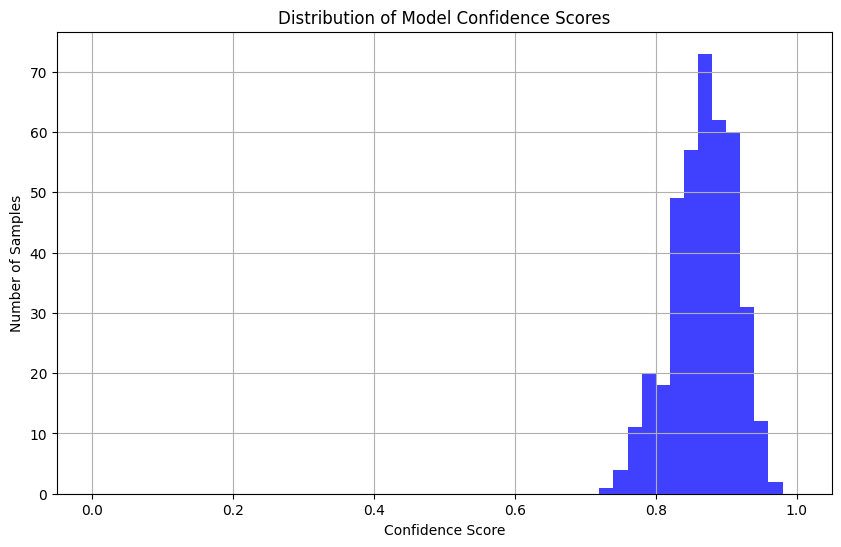

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=50, range=(0, 1), alpha=0.75, color='blue')
plt.title('Distribution of Model Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()


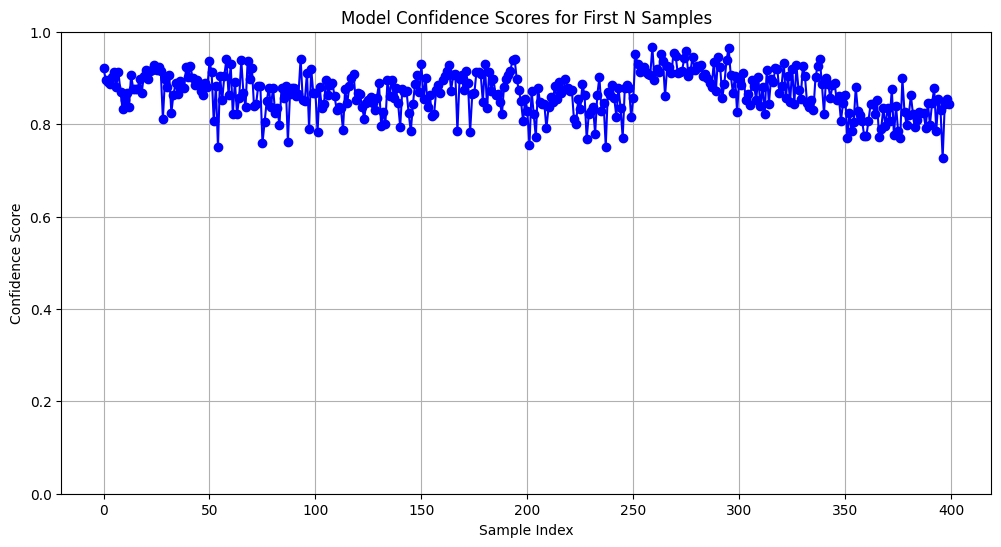

In [ ]:
# Plot confidence scores for the first N samples
N = len(y_test)  # Number of samples to plot
sample_indices = np.arange(N)
sample_confidences = confidence_scores[:N]

plt.figure(figsize=(12, 6))
plt.plot(sample_indices, sample_confidences, marker='o', linestyle='-', color='blue')
plt.title('Model Confidence Scores for First N Samples')
plt.xlabel('Sample Index')
plt.ylabel('Confidence Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [ ]:

class_names=["1","2","3","4","5","6","7","8"]
def idx_to_str(index):
    return class_names[index]

In [ ]:
import numpy as np
import pandas as pd

# Get predictions from models
tcn_pred = TCN_model.predict(x_test)  # Shape: (num_samples, num_classes)
confidence_values = confidnet_model.predict(x_test).flatten()  # Shape: (num_samples,)

# Prepare data for the DataFrame
data = []

for i in range(len(tcn_pred)):
    # Get true class index
    true_index = np.argmax(y_test[i])  # Assuming y_train is one-hot encoded
    # Get predicted class index
    predicted_index = np.argmax(tcn_pred[i])

    # Get maximum confidence prediction (MCP)
    max_conf = np.max(tcn_pred[i])  # Should be scalar

    # Get predicted confidence for the true class (TCP)
    c_star = tcn_pred[i][true_index]

    # Normalize TCP by MCP to get yc_star
    c_star_normalized = c_star / (max_conf + 1e-8)  # Should be scalar

    # Get confidence value from confidence model
    conf_value = confidence_values[i]  # Should be scalar

    # Optionally convert indices to class labels
    if 'idx_to_str' in globals():
        ground_truth = idx_to_str(true_index)
        predicted_class = idx_to_str(predicted_index)
    else:
        ground_truth = true_index
        predicted_class = predicted_index

    pred_class_prob = max_conf  # Probability of the predicted class

    # Append row data
    data.append([ground_truth, predicted_class, pred_class_prob, conf_value, c_star_normalized])
    # data.append([ground_truth, predicted_class, pred_class_prob, conf_value, c_star])

# Create DataFrame
df = pd.DataFrame(data, columns=['ground_truth', 'prediction', 'p(predicted class)', 'confidence', 'yc_star'])

# Display DataFrame
df


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,ground_truth,prediction,p(predicted class),confidence,yc_star
0,1,1,0.926929,0.920773,1.000000
1,1,1,0.882867,0.896559,1.000000
2,1,1,0.854306,0.890607,1.000000
3,1,1,0.881142,0.886964,1.000000
4,1,1,0.925566,0.902349,1.000000
...,...,...,...,...,...
395,8,8,0.791883,0.830306,1.000000
396,8,4,0.343224,0.726089,0.319577
397,8,8,0.915068,0.842612,1.000000
398,8,8,0.898905,0.853651,1.000000


In [ ]:
# #### For train data

# import numpy as np
# import csv

# # Assuming you have the following variables:
# # - tcn_pred: predictions from TCN_model on your test data, shape (num_samples, num_classes)
# # - confidence_values: confidences from confidnet_model on your test data, shape (num_samples,)
# # - Y_test: ground truth labels, shape (num_samples, num_classes) (one-hot encoded)
# # - idx_to_str: a function to convert class indices to class labels (if needed)

# # Get predictions from models
# tcn_pred = TCN_model.predict(x_train)  # Shape: (num_samples, num_classes)
# confidence_values = confidnet_model.predict(x_train).flatten()  # Shape: (num_samples,)

# # Open a file to write CSV data
# filename = 'confidence_estimates.csv'
# with open(filename, mode='w', newline='') as file:
#     writer = csv.writer(file)

#     # Write the header row
#     writer.writerow(['ground_truth', 'prediction', 'p(predicted class)', 'confidence', 'yc_star'])

#     # Loop through your data and compute yc_star, then write each row to the CSV file
#     for i in range(len(tcn_pred)):
#         # Get true class index
#         true_index = np.argmax(y_train[i])  # Assuming Y_test is one-hot encoded
#         # Get predicted class index
#         predicted_index = np.argmax(tcn_pred[i])

#         # Get maximum confidence prediction (MCP)
#         max_conf = np.max(tcn_pred[i])  # Should be scalar

#         # Get predicted confidence for the true class (TCP)
#         c_star = tcn_pred[i][true_index]

#         # Normalize TCP by MCP to get yc_star
#         c_star_normalized = c_star / (max_conf + 1e-8)  # Should be scalar

#         # Get confidence value from confidence model
#         conf_value = confidence_values[i]  # Should be scalar

#         # Optionally convert indices to class labels
#         if 'idx_to_str' in globals():
#             ground_truth = idx_to_str(true_index)
#             predicted_class = idx_to_str(predicted_index)
#         else:
#             ground_truth = true_index
#             predicted_class = predicted_index

#         pred_class_prob = max_conf  # Probability of the predicted class

#         # Write the row to the CSV file
#         writer.writerow([ground_truth, predicted_class, pred_class_prob, conf_value, c_star_normalized])

# print(f"Predictions saved to {filename}")


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# # split="test"
# # Step 1: Read the CSV file
# df = pd.read_csv('confidence_estimates.csv')
# df

In [ ]:
import numpy as np
new_df = df[~np.isclose(df['yc_star'], 1.0)]
new_df

,ground_truth,prediction,p(predicted class),confidence,yc_star
52,2,7,0.363661,0.806364,0.620041
54,2,1,0.431309,0.750216,0.874199
56,2,3,0.355755,0.851290,0.767225
88,2,1,0.325515,0.865804,0.656470
100,3,1,0.397505,0.866729,0.327268
104,3,5,0.420863,0.843027,0.808698
113,3,7,0.500126,0.787839,0.089689
122,3,2,0.272959,0.838080,0.949178
123,3,4,0.302284,0.811625,0.075705
125,3,7,0.912684,0.853232,0.019109


In [ ]:
mean_confidence = df['confidence'].mean()
mean_confidence

0.8676698

In [ ]:
mean_confidence2 = new_df['confidence'].mean()
mean_confidence2

0.83451986

In [ ]:
mean_yc_star = new_df['yc_star'].mean()
mean_yc_star

0.535843349413385

In [ ]:
# # import matplotlib.pyplot as plt
# # import pandas as pd
# # import numpy as np


# # Step 2: Determine successes and errors
# successes = df[df['ground_truth'] == df['prediction']]['yc_star']  # Success: ground_truth == prediction
# errors = df[df['ground_truth'] != df['prediction']]['yc_star']     # Errors: ground_truth != prediction
# print(len(successes), len(errors))

# # Step 3: Create histogram data for successes and errors
# bins = np.linspace(0, 1, 11)  # Create 10 bins between 0 and 1

# # Compute histogram values
# success_hist, _ = np.histogram(successes, bins=bins)
# error_hist, _ = np.histogram(errors, bins=bins)

# # Find the overlapping areas
# overlap_hist = np.minimum(success_hist, error_hist)

# # Step 4: Plot the histograms with different colors
# plt.figure(figsize=(10, 6))

# # Plot Successes
# plt.bar(bins[:-1], success_hist, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)

# # Plot Errors
# plt.bar(bins[:-1], error_hist, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)

# # Plot Overlap with a third color (purple)
# plt.bar(bins[:-1], overlap_hist, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)

# plt.title('Confidence TCP Histogram: Successes vs Errors')
# plt.xlabel('Confidence TCP')
# plt.ylabel('Count')
# plt.legend(loc='upper left')
# plt.grid(True)
# # plt.savefig('Successes_vs_Errors_Histogram_yc_star'+versions+split+'.png')
# plt.show()

In [ ]:

# # Step 2: Determine successes and errors
# successes = df[df['ground_truth'] == df['prediction']]['p(predicted class)']  # Success: ground_truth == prediction
# errors = df[df['ground_truth'] != df['prediction']]['p(predicted class)']     # Error: ground_truth != prediction




# # successes = df[df['ground_truth'] == df['prediction']]['yc_star']  # Success: ground_truth == prediction
# # errors = df[df['ground_truth'] != df['prediction']]['yc_star']     # Errors: ground_truth != prediction
# print(len(successes), len(errors))

# # Step 3: Create histogram data for successes and errors
# bins = np.linspace(0, 1, 11)  # Create 10 bins between 0 and 1

# # Compute histogram values
# success_hist, _ = np.histogram(successes, bins=bins)
# error_hist, _ = np.histogram(errors, bins=bins)

# # Find the overlapping areas
# overlap_hist = np.minimum(success_hist, error_hist)

# # Step 4: Plot the histograms with different colors
# plt.figure(figsize=(10, 6))

# # Plot Successes
# plt.bar(bins[:-1], success_hist, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)

# # Plot Errors
# plt.bar(bins[:-1], error_hist, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)

# # Plot Overlap with a third color (purple)
# plt.bar(bins[:-1], overlap_hist, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)

# print(f"Number of successes: {len(successes)}, Number of errors: {len(errors)}")
# # Customize the plot
# plt.title('Confidence MCP Histogram: Successes vs Errors')
# plt.xlabel('Confidence MCP')
# plt.ylabel('Count')
# plt.legend(loc='upper left')
# plt.grid(True)

# # Step 5: Save and show the plot
# # plt.savefig('Successes_vs_Errors_Histogram_predicted'+versions+split+'.png')
# plt.show()


Number of successes (predicted class): 358, Number of errors (predicted class): 42
Number of successes (confidence): 358, Number of errors (confidence): 42


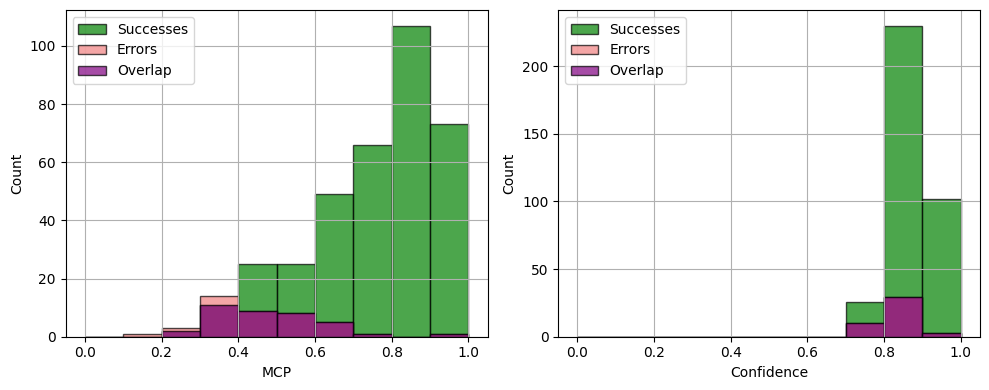

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with relevant columns

# Step 1: Define Successes and Errors based on 'p(predicted class)' and 'confidence'
successes_predicted = df[df['ground_truth'] == df['prediction']]['p(predicted class)']
errors_predicted = df[df['ground_truth'] != df['prediction']]['p(predicted class)']

successes_confidence = df[df['ground_truth'] == df['prediction']]['confidence']
errors_confidence = df[df['ground_truth'] != df['prediction']]['confidence']

# Print counts for verification
print(f"Number of successes (predicted class): {len(successes_predicted)}, Number of errors (predicted class): {len(errors_predicted)}")
print(f"Number of successes (confidence): {len(successes_confidence)}, Number of errors (confidence): {len(errors_confidence)}")

# Step 2: Create bins for histogram
bins = np.linspace(0, 1, 11)  # 10 bins between 0 and 1

# Step 3: Compute histogram values
success_hist_predicted, _ = np.histogram(successes_predicted, bins=bins)
error_hist_predicted, _ = np.histogram(errors_predicted, bins=bins)
overlap_hist_predicted = np.minimum(success_hist_predicted, error_hist_predicted)

success_hist_confidence, _ = np.histogram(successes_confidence, bins=bins)
error_hist_confidence, _ = np.histogram(errors_confidence, bins=bins)
overlap_hist_confidence = np.minimum(success_hist_confidence, error_hist_confidence)

# Step 4: Plot both histograms in a single figure with subplots
plt.figure(figsize=(10, 4))

# First subplot: p(predicted class) Histogram
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], success_hist_predicted, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)
plt.bar(bins[:-1], error_hist_predicted, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)
plt.bar(bins[:-1], overlap_hist_predicted, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)
# plt.title('MCP Histogram: Successes vs Errors')
plt.xlabel('MCP')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: Confidence Histogram
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], success_hist_confidence, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)
plt.bar(bins[:-1], error_hist_confidence, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)
plt.bar(bins[:-1], overlap_hist_confidence, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)
# plt.title('Confidence Histogram: Successes vs Errors')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
# plt.savefig('Combined_Successes_vs_Errors_Histogram'+versions+split+'.png')
plt.show()


Number of successes (predicted class): 358, Number of errors (predicted class): 42
Number of successes (confidence): 358, Number of errors (confidence): 42
Number of successes (yc_star): 358, Number of errors (yc_star): 42


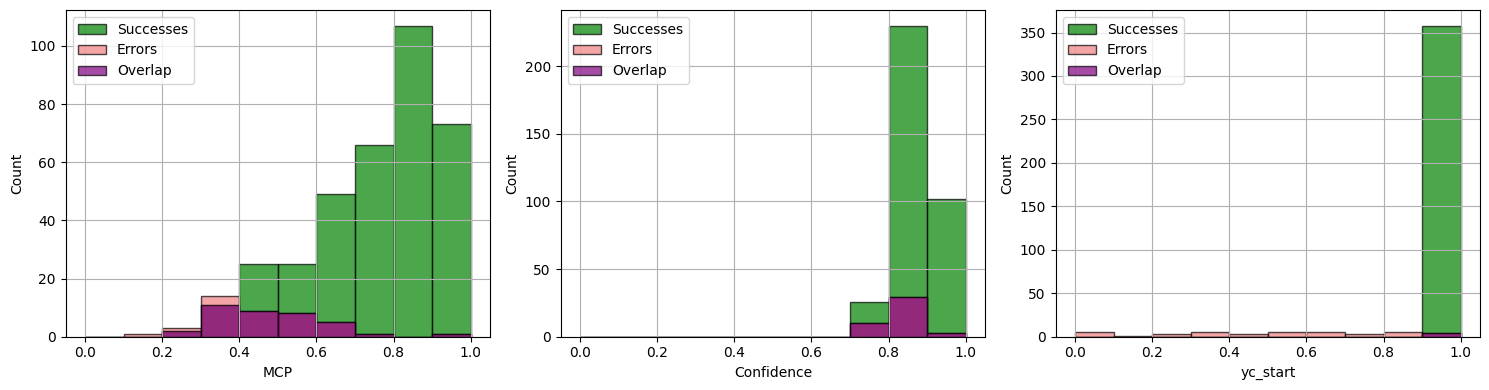

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with relevant columns

# Step 1: Define Successes and Errors based on different metrics
successes_predicted = df[df['ground_truth'] == df['prediction']]['p(predicted class)']
errors_predicted = df[df['ground_truth'] != df['prediction']]['p(predicted class)']

successes_confidence = df[df['ground_truth'] == df['prediction']]['confidence']
errors_confidence = df[df['ground_truth'] != df['prediction']]['confidence']

successes_yc_start = df[df['ground_truth'] == df['prediction']]['yc_star']
errors_yc_start = df[df['ground_truth'] != df['prediction']]['yc_star']

# Print counts for verification
print(f"Number of successes (predicted class): {len(successes_predicted)}, Number of errors (predicted class): {len(errors_predicted)}")
print(f"Number of successes (confidence): {len(successes_confidence)}, Number of errors (confidence): {len(errors_confidence)}")
print(f"Number of successes (yc_star): {len(successes_yc_start)}, Number of errors (yc_star): {len(errors_yc_start)}")

# Step 2: Create bins for histogram
bins = np.linspace(0, 1, 11)  # 10 bins between 0 and 1

# Step 3: Compute histogram values
success_hist_predicted, _ = np.histogram(successes_predicted, bins=bins)
error_hist_predicted, _ = np.histogram(errors_predicted, bins=bins)
overlap_hist_predicted = np.minimum(success_hist_predicted, error_hist_predicted)

success_hist_confidence, _ = np.histogram(successes_confidence, bins=bins)
error_hist_confidence, _ = np.histogram(errors_confidence, bins=bins)
overlap_hist_confidence = np.minimum(success_hist_confidence, error_hist_confidence)

success_hist_yc_start, _ = np.histogram(successes_yc_start, bins=bins)
error_hist_yc_start, _ = np.histogram(errors_yc_start, bins=bins)
overlap_hist_yc_start = np.minimum(success_hist_yc_start, error_hist_yc_start)

# Step 4: Plot histograms in a single figure with subplots
plt.figure(figsize=(15, 4))

# First subplot: p(predicted class) Histogram
plt.subplot(1, 3, 1)
plt.bar(bins[:-1], success_hist_predicted, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)
plt.bar(bins[:-1], error_hist_predicted, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)
plt.bar(bins[:-1], overlap_hist_predicted, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)
plt.xlabel('MCP')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)

# Second subplot: Confidence Histogram
plt.subplot(1, 3, 2)
plt.bar(bins[:-1], success_hist_confidence, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)
plt.bar(bins[:-1], error_hist_confidence, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)
plt.bar(bins[:-1], overlap_hist_confidence, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)

# Third subplot: yc_start Histogram
plt.subplot(1, 3, 3)
plt.bar(bins[:-1], success_hist_yc_start, width=np.diff(bins), align='edge', color='green', edgecolor='black', label='Successes', alpha=0.7)
plt.bar(bins[:-1], error_hist_yc_start, width=np.diff(bins), align='edge', color='lightcoral', edgecolor='black', label='Errors', alpha=0.7)
plt.bar(bins[:-1], overlap_hist_yc_start, width=np.diff(bins), align='edge', color='purple', edgecolor='black', label='Overlap', alpha=0.7)
plt.xlabel('yc_start')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.show()


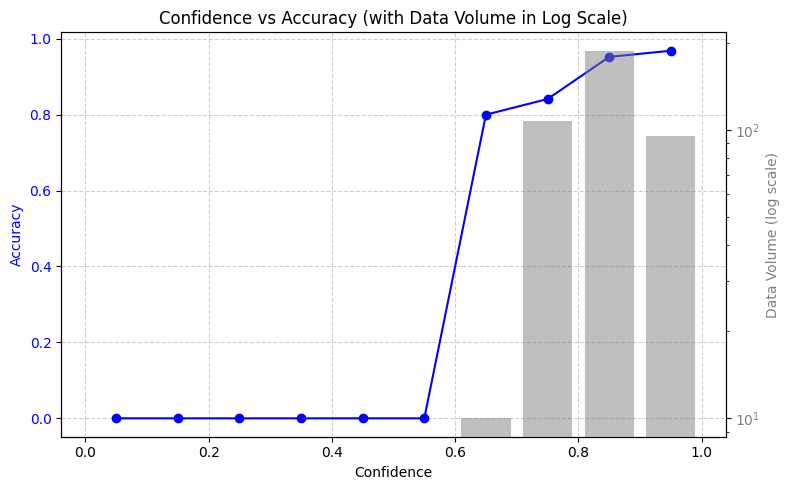

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define confidence bins
bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1
df['confidence_bin'] = np.digitize(df['confidence'], bins) - 1  # Assign bins

# Compute accuracy and count per bin
bin_accuracies = []
bin_counts = []
bin_centers = []

for i in range(10):  # 10 bins
    bin_data = df[df['confidence_bin'] == i]
    count = len(bin_data)
    bin_counts.append(count)  # Store count of points

    if count > 0:
        accuracy = (bin_data['ground_truth'] == bin_data['prediction']).mean()
        bin_accuracies.append(accuracy)
    else:
        bin_accuracies.append(0)  # No data in bin

    # Get center of the bin
    bin_centers.append((bins[i] + bins[i+1]) / 2)

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot accuracy
ax1.plot(bin_centers, bin_accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Accuracy", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot volume of points as a bar chart with log scale
ax2 = ax1.twinx()
ax2.bar(bin_centers, bin_counts, width=0.08, alpha=0.5, color='gray', label="Data Volume")
ax2.set_yscale('log')  # Set logarithmic scale
ax2.set_ylabel("Data Volume (log scale)", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Add title and grid
plt.title("Confidence vs Accuracy (with Data Volume in Log Scale)")
ax1.grid(True, which="both", linestyle="--", alpha=0.6)

fig.tight_layout()
plt.show()


##Balanced Training

In [ ]:
import numpy as np

# Predict on the training data using the pre-trained model
y_train_pred_probs = TCN_model.predict(x_train)  # Shape: (num_samples, num_classes)
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=-1)

# Convert Y_train to class labels if it's one-hot encoded
y_train_true_classes = np.argmax(y_train, axis=-1)

# Identify indices of error and success samples
error_indices = np.where(y_train_pred_classes != y_train_true_classes)[0]
success_indices = np.where(y_train_pred_classes == y_train_true_classes)[0]

print(f"Number of success samples: {len(success_indices)}")
print(f"Number of error samples: {len(error_indices)}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Number of success samples: 2885
Number of error samples: 315


In [ ]:
def create_batches(X_train, Y_train, error_indices, success_indices, batch_size, num_error_per_batch):
    num_error_samples = len(error_indices)
    num_success_samples = len(success_indices)

    # Shuffle indices at the start of each epoch
    np.random.shuffle(error_indices)
    np.random.shuffle(success_indices)

    # Initialize variables
    used_error_indices = 0
    used_success_indices = 0
    batches_X = []
    batches_Y = []

    # Calculate the number of full batches
    num_full_batches = num_error_samples // num_error_per_batch

    for _ in range(num_full_batches):
        # Select error samples
        error_start = used_error_indices
        error_end = used_error_indices + num_error_per_batch
        batch_error_indices = error_indices[error_start:error_end]
        used_error_indices = error_end

        # Select success samples
        num_success_needed = batch_size - num_error_per_batch
        success_end = used_success_indices + num_success_needed

        if success_end > num_success_samples:
            # Reshuffle and reset success indices
            np.random.shuffle(success_indices)
            used_success_indices = 0
            success_end = num_success_needed

        batch_success_indices = success_indices[used_success_indices:used_success_indices + num_success_needed]
        used_success_indices += num_success_needed

        # Combine and shuffle batch indices
        batch_indices = np.concatenate([batch_error_indices, batch_success_indices])
        np.random.shuffle(batch_indices)

        # Get data and labels for the batch
        batch_X = X_train[batch_indices]
        batch_Y = Y_train[batch_indices]

        batches_X.append(batch_X)
        batches_Y.append(batch_Y)

    # Handle remaining error samples (if any)
    remaining_error_samples = num_error_samples % num_error_per_batch
    if remaining_error_samples > 0:
        error_start = used_error_indices
        error_end = used_error_indices + remaining_error_samples
        batch_error_indices = error_indices[error_start:error_end]

        num_success_needed = batch_size - remaining_error_samples
        success_end = used_success_indices + num_success_needed

        if success_end > num_success_samples:
            # Reshuffle and reset success indices
            np.random.shuffle(success_indices)
            used_success_indices = 0
            success_end = num_success_needed

        batch_success_indices = success_indices[used_success_indices:used_success_indices + num_success_needed]
        used_success_indices += num_success_needed

        # Combine and shuffle batch indices
        batch_indices = np.concatenate([batch_error_indices, batch_success_indices])
        np.random.shuffle(batch_indices)

        # Get data and labels for the batch
        batch_X = X_train[batch_indices]
        batch_Y = Y_train[batch_indices]

        batches_X.append(batch_X)
        batches_Y.append(batch_Y)

    return batches_X, batches_Y


In [ ]:
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pre = TCN_model(x, training=True)  # Shape: (batch_size, num_classes)
        y_conf = confidnet_model(x)  # Shape: (batch_size, 1)

        # Calculate loss with the updated loss function
        loss = l_conf(y, y_pre, y_conf)
    grads = tape.gradient(loss, confidnet_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, confidnet_model.trainable_variables))
    return loss

def test_step(x, y):
    y_pre = TCN_model(x, training=False)  # Shape: (batch_size, num_classes)
    y_conf = confidnet_model(x, training=False)  # Shape: (batch_size, 1)
    loss = l_conf(y, y_pre, y_conf)
    return loss


In [ ]:
batch_size = 64  # Ensure batch_size > 20
num_error_per_batch = 40
epochs = 100  # Define the number of epochs

In [ ]:
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Create batches for the epoch
    batches_X, batches_Y = create_batches(
        x_train,
        y_train,
        error_indices,
        success_indices,
        batch_size,
        num_error_per_batch
    )

    # Convert batches to arrays
    batches_X = np.array(batches_X)
    batches_Y = np.array(batches_Y)

    # Create the dataset from batches
    train_dataset = tf.data.Dataset.from_tensor_slices((batches_X, batches_Y))
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

    # Training step
    for step, (x_batch, y_batch) in enumerate(tqdm(train_dataset, total=len(train_dataset))):
        loss_value = train_step(x_batch, y_batch)

    # Validation step remains the same
    total_val_loss = 0
    for x_val_batch, y_val_batch in val_dataset:
        val_loss_value = test_step(x_val_batch, y_val_batch)
        total_val_loss += val_loss_value

    avg_val_loss = total_val_loss / len(val_dataset)
    print(f'Validation Loss: {avg_val_loss.numpy():.4f}')


Epoch 1/100


100%|██████████| 8/8 [00:00<00:00, 10.55it/s]


Validation Loss: 0.1202
Epoch 2/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1200
Epoch 3/100


100%|██████████| 8/8 [00:00<00:00,  8.08it/s]


Validation Loss: 0.1196
Epoch 4/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1192
Epoch 5/100


100%|██████████| 8/8 [00:00<00:00, 10.85it/s]


Validation Loss: 0.1190
Epoch 6/100


100%|██████████| 8/8 [00:00<00:00, 10.69it/s]


Validation Loss: 0.1189
Epoch 7/100


100%|██████████| 8/8 [00:00<00:00, 10.66it/s]


Validation Loss: 0.1187
Epoch 8/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1185
Epoch 9/100


100%|██████████| 8/8 [00:00<00:00, 10.76it/s]


Validation Loss: 0.1182
Epoch 10/100


100%|██████████| 8/8 [00:00<00:00, 10.47it/s]


Validation Loss: 0.1177
Epoch 11/100


100%|██████████| 8/8 [00:00<00:00, 10.95it/s]


Validation Loss: 0.1172
Epoch 12/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1166
Epoch 13/100


100%|██████████| 8/8 [00:00<00:00,  9.46it/s]


Validation Loss: 0.1162
Epoch 14/100


100%|██████████| 8/8 [00:00<00:00, 10.65it/s]


Validation Loss: 0.1156
Epoch 15/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1151
Epoch 16/100


100%|██████████| 8/8 [00:01<00:00,  6.33it/s]


Validation Loss: 0.1146
Epoch 17/100


100%|██████████| 8/8 [00:00<00:00, 10.40it/s]


Validation Loss: 0.1144
Epoch 18/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1141
Epoch 19/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1137
Epoch 20/100


100%|██████████| 8/8 [00:00<00:00, 10.36it/s]


Validation Loss: 0.1138
Epoch 21/100


100%|██████████| 8/8 [00:01<00:00,  6.31it/s]


Validation Loss: 0.1137
Epoch 22/100


100%|██████████| 8/8 [00:00<00:00, 10.70it/s]


Validation Loss: 0.1135
Epoch 23/100


100%|██████████| 8/8 [00:00<00:00, 10.66it/s]


Validation Loss: 0.1135
Epoch 24/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1136
Epoch 25/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1132
Epoch 26/100


100%|██████████| 8/8 [00:00<00:00, 10.97it/s]


Validation Loss: 0.1131
Epoch 27/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1130
Epoch 28/100


100%|██████████| 8/8 [00:01<00:00,  6.31it/s]


Validation Loss: 0.1129
Epoch 29/100


100%|██████████| 8/8 [00:00<00:00, 10.58it/s]


Validation Loss: 0.1130
Epoch 30/100


100%|██████████| 8/8 [00:01<00:00,  6.31it/s]


Validation Loss: 0.1130
Epoch 31/100


100%|██████████| 8/8 [00:00<00:00, 10.56it/s]


Validation Loss: 0.1130
Epoch 32/100


100%|██████████| 8/8 [00:00<00:00, 10.33it/s]


Validation Loss: 0.1133
Epoch 33/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1134
Epoch 34/100


100%|██████████| 8/8 [00:00<00:00, 10.55it/s]


Validation Loss: 0.1137
Epoch 35/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1138
Epoch 36/100


100%|██████████| 8/8 [00:00<00:00, 10.69it/s]


Validation Loss: 0.1138
Epoch 37/100


100%|██████████| 8/8 [00:00<00:00, 10.38it/s]


Validation Loss: 0.1138
Epoch 38/100


100%|██████████| 8/8 [00:00<00:00, 10.42it/s]


Validation Loss: 0.1138
Epoch 39/100


100%|██████████| 8/8 [00:00<00:00,  9.49it/s]


Validation Loss: 0.1137
Epoch 40/100


100%|██████████| 8/8 [00:01<00:00,  6.98it/s]


Validation Loss: 0.1132
Epoch 41/100


100%|██████████| 8/8 [00:00<00:00, 10.62it/s]


Validation Loss: 0.1129
Epoch 42/100


100%|██████████| 8/8 [00:00<00:00, 10.46it/s]


Validation Loss: 0.1127
Epoch 43/100


100%|██████████| 8/8 [00:01<00:00,  6.33it/s]


Validation Loss: 0.1125
Epoch 44/100


100%|██████████| 8/8 [00:00<00:00, 10.86it/s]


Validation Loss: 0.1125
Epoch 45/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1124
Epoch 46/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1123
Epoch 47/100


100%|██████████| 8/8 [00:00<00:00, 10.82it/s]


Validation Loss: 0.1119
Epoch 48/100


100%|██████████| 8/8 [00:00<00:00, 10.94it/s]


Validation Loss: 0.1118
Epoch 49/100


100%|██████████| 8/8 [00:01<00:00,  7.55it/s]


Validation Loss: 0.1119
Epoch 50/100


100%|██████████| 8/8 [00:01<00:00,  7.58it/s]


Validation Loss: 0.1119
Epoch 51/100


100%|██████████| 8/8 [00:00<00:00, 10.23it/s]


Validation Loss: 0.1119
Epoch 52/100


100%|██████████| 8/8 [00:00<00:00, 10.87it/s]


Validation Loss: 0.1119
Epoch 53/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1117
Epoch 54/100


100%|██████████| 8/8 [00:00<00:00, 10.31it/s]


Validation Loss: 0.1118
Epoch 55/100


100%|██████████| 8/8 [00:00<00:00, 10.57it/s]


Validation Loss: 0.1118
Epoch 56/100


100%|██████████| 8/8 [00:00<00:00, 10.73it/s]


Validation Loss: 0.1117
Epoch 57/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1115
Epoch 58/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1115
Epoch 59/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1118
Epoch 60/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1117
Epoch 61/100


100%|██████████| 8/8 [00:00<00:00, 10.69it/s]


Validation Loss: 0.1116
Epoch 62/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1116
Epoch 63/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1116
Epoch 64/100


100%|██████████| 8/8 [00:00<00:00, 10.54it/s]


Validation Loss: 0.1117
Epoch 65/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1120
Epoch 66/100


100%|██████████| 8/8 [00:00<00:00, 10.09it/s]


Validation Loss: 0.1122
Epoch 67/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1123
Epoch 68/100


100%|██████████| 8/8 [00:01<00:00,  6.31it/s]


Validation Loss: 0.1122
Epoch 69/100


100%|██████████| 8/8 [00:00<00:00, 10.56it/s]


Validation Loss: 0.1119
Epoch 70/100


100%|██████████| 8/8 [00:00<00:00, 10.33it/s]


Validation Loss: 0.1120
Epoch 71/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1119
Epoch 72/100


100%|██████████| 8/8 [00:00<00:00, 10.42it/s]


Validation Loss: 0.1117
Epoch 73/100


100%|██████████| 8/8 [00:00<00:00, 10.28it/s]


Validation Loss: 0.1119
Epoch 74/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1123
Epoch 75/100


100%|██████████| 8/8 [00:00<00:00, 10.29it/s]


Validation Loss: 0.1124
Epoch 76/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1124
Epoch 77/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1125
Epoch 78/100


100%|██████████| 8/8 [00:00<00:00, 10.25it/s]


Validation Loss: 0.1125
Epoch 79/100


100%|██████████| 8/8 [00:00<00:00, 10.21it/s]


Validation Loss: 0.1124
Epoch 80/100


100%|██████████| 8/8 [00:00<00:00, 10.26it/s]


Validation Loss: 0.1123
Epoch 81/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1122
Epoch 82/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1121
Epoch 83/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1117
Epoch 84/100


100%|██████████| 8/8 [00:00<00:00, 10.32it/s]


Validation Loss: 0.1114
Epoch 85/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1111
Epoch 86/100


100%|██████████| 8/8 [00:00<00:00,  8.94it/s]


Validation Loss: 0.1108
Epoch 87/100


100%|██████████| 8/8 [00:00<00:00, 10.31it/s]


Validation Loss: 0.1106
Epoch 88/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1102
Epoch 89/100


100%|██████████| 8/8 [00:00<00:00, 10.42it/s]


Validation Loss: 0.1096
Epoch 90/100


100%|██████████| 8/8 [00:00<00:00, 10.58it/s]


Validation Loss: 0.1096
Epoch 91/100


100%|██████████| 8/8 [00:00<00:00, 10.53it/s]


Validation Loss: 0.1098
Epoch 92/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1098
Epoch 93/100


100%|██████████| 8/8 [00:00<00:00, 10.30it/s]


Validation Loss: 0.1094
Epoch 94/100


100%|██████████| 8/8 [00:00<00:00,  9.64it/s]


Validation Loss: 0.1093
Epoch 95/100


100%|██████████| 8/8 [00:01<00:00,  7.24it/s]


Validation Loss: 0.1093
Epoch 96/100


100%|██████████| 8/8 [00:01<00:00,  6.31it/s]


Validation Loss: 0.1093
Epoch 97/100


100%|██████████| 8/8 [00:00<00:00, 10.49it/s]


Validation Loss: 0.1092
Epoch 98/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1090
Epoch 99/100


100%|██████████| 8/8 [00:00<00:00, 10.25it/s]


Validation Loss: 0.1087
Epoch 100/100


100%|██████████| 8/8 [00:01<00:00,  6.32it/s]


Validation Loss: 0.1082


## IRIS

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train, y_train, epochs=50, verbose=1) # training the model

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 28, 28, 1), dtype=float32). Expected shape (None, 4), but input has incompatible shape (None, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
standard_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
standard_accuracy

0.7666666507720947

In [ ]:
n_samples = 100

def monte_carlo_dropout_predict(model, X, n_samples):
    predictions = []
    for _ in range(n_samples):
        predictions.append(model(X, training=True))

    predictions = np.array(predictions)
    mean_predictions = predictions.mean(axis=0)
    uncertainty = predictions.var(axis=0)

    return mean_predictions, uncertainty
X_test=np.array(X_test) # to convert tuple to array format

In [ ]:
mean_predictions, uncertainty=monte_carlo_dropout_predict(model, X_test, n_samples)

In [ ]:
accuracy = np.mean(np.argmax(mean_predictions, axis=1) == y_test)

In [ ]:
accuracy

0.8

In [ ]:
uncertainty

array([[0.01256036, 0.0211904 , 0.02486813],
       [0.01982287, 0.006479  , 0.00465274],
       [0.00803616, 0.02797852, 0.03748434],
       [0.0115509 , 0.0162691 , 0.01923421],
       [0.01770678, 0.01708498, 0.02648469],
       [0.02766041, 0.00909447, 0.00590315],
       [0.03175582, 0.01506781, 0.01814372],
       [0.00618896, 0.02247646, 0.02809564],
       [0.00861719, 0.01801635, 0.0253264 ],
       [0.01516487, 0.01121263, 0.01644252],
       [0.01435097, 0.02441454, 0.03701932],
       [0.02822869, 0.0090152 , 0.00691187],
       [0.02169069, 0.00617264, 0.00605496],
       [0.01893829, 0.00628672, 0.00505077],
       [0.01552615, 0.00678247, 0.00242658],
       [0.01074901, 0.02192191, 0.02467765],
       [0.00988137, 0.02009008, 0.02981569],
       [0.01507684, 0.01486316, 0.01856508],
       [0.01192586, 0.01703876, 0.02619789],
       [0.0068378 , 0.02365155, 0.03518568],
       [0.02589635, 0.00961604, 0.00522706],
       [0.01405026, 0.01658683, 0.02482741],
       [0.